**Import libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_excel('Online Retail.xlsx')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# Check for missing values and data types
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


**Data cleaning**

In [ ]:
# Drop rows with missing CustomerID
df = df.dropna(subset=['CustomerID'])

# Check for duplicates
df = df.drop_duplicates()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


**Purchase frequency**

In [ ]:
# Group by CustomerID to count the number of purchases
purchase_frequency = df.groupby('CustomerID')['InvoiceNo'].count().reset_index()
purchase_frequency.columns = ['CustomerID', 'PurchaseFrequency']

# Display the results
purchase_frequency.head()


,CustomerID,PurchaseFrequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


**Amount of money spent by each customer**

In [ ]:
# Create a column for total amount spent per transaction
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

# Group by CustomerID to sum the total amount spent
monetary_value = df.groupby('CustomerID')['TotalAmount'].sum().reset_index()
monetary_value.columns = ['CustomerID', 'MonetaryValue']

# Display the results
monetary_value.head()


,CustomerID,MonetaryValue
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


**Product preference**

In [ ]:
# Group by StockCode and Description to count how many times each product was purchased
product_preferences = df.groupby(['StockCode', 'Description'])['Quantity'].sum().reset_index()
product_preferences.columns = ['StockCode', 'Description', 'TotalQuantity']

# Sort by total quantity to find the most popular products
product_preferences = product_preferences.sort_values(by='TotalQuantity', ascending=False)


# Display the top products
product_preferences.head()


,StockCode,Description,TotalQuantity
2712,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53119
3586,85099B,JUMBO BAG RED RETROSPOT,44963
2818,84879,ASSORTED COLOUR BIRD ORNAMENT,35215
3593,85123A,WHITE HANGING HEART T-LIGHT HOLDER,34128
361,21212,PACK OF 72 RETROSPOT CAKE CASES,33386


**Visualization**

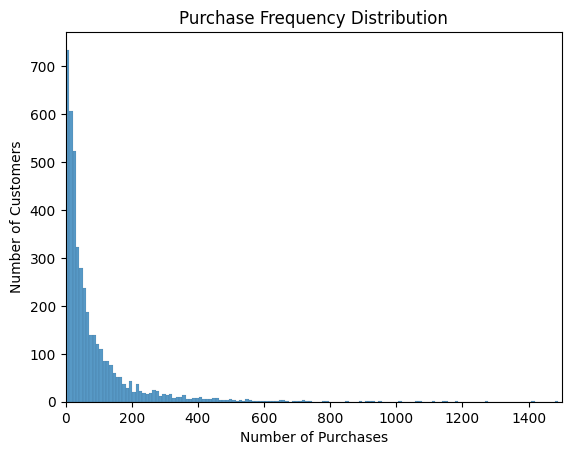

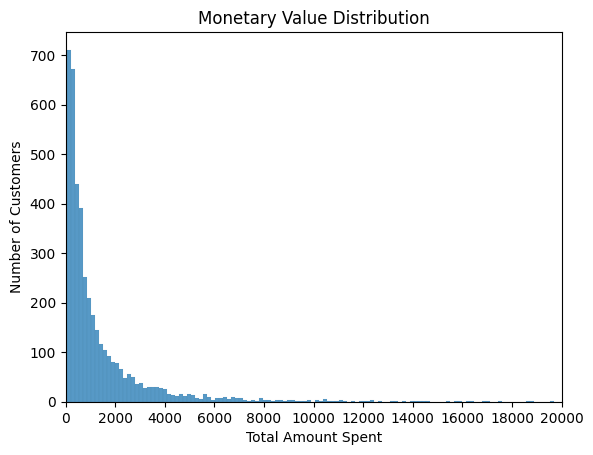

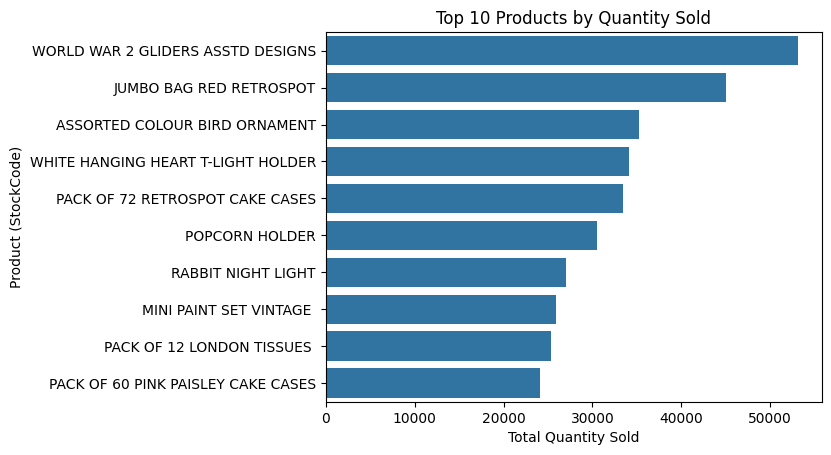

In [ ]:
# Plot the purchase frequency distribution
sns.histplot(purchase_frequency['PurchaseFrequency'], kde=False)
plt.title('Purchase Frequency Distribution')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
# Set the tick interval of 500 on the x-axis
plt.xticks(range(0, 10001, 200))
# Limit the x-axis to 10,000
plt.xlim(0, 1500)
plt.show()


# Plot monetary value distribution
sns.histplot(monetary_value['MonetaryValue'], kde=False)
plt.title('Monetary Value Distribution')
plt.xlabel('Total Amount Spent')
plt.ylabel('Number of Customers')
# Set the tick interval of 5000 on the x-axis
plt.xticks(range(0, int(monetary_value['MonetaryValue'].max()) + 2000, 2000))
# Limit the x-axis to 10,000
plt.xlim(0, 20000)
plt.show()

# Plot top products by quantity sold
top_products = product_preferences.head(10)
sns.barplot(x='TotalQuantity', y='Description', data=top_products)
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product (StockCode)')
plt.show()


In [ ]:
customer_segmentation = pd.merge(purchase_frequency, monetary_value, on='CustomerID')
customer_segmentation.head()

,CustomerID,PurchaseFrequency,MonetaryValue
0,12346.0,2,0.00
1,12347.0,182,4310.00
2,12348.0,31,1797.24
3,12349.0,73,1757.55
4,12350.0,17,334.40


In [ ]:
X = customer_segmentation[['PurchaseFrequency', 'MonetaryValue']]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

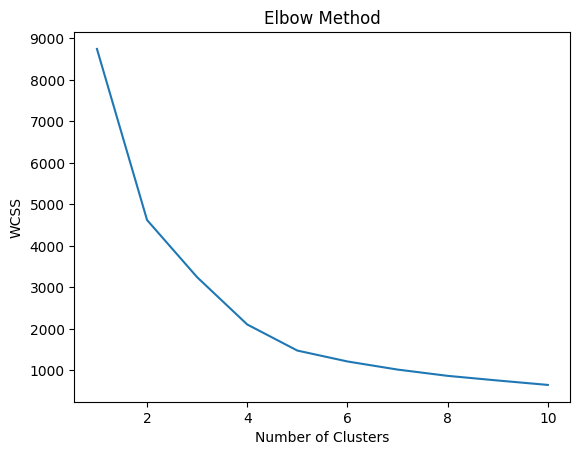

In [ ]:
# Determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within-cluster Sum of Square
plt.show()

In [ ]:
# Choose the optimal number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original data
customer_segmentation['Cluster'] = clusters
customer_segmentation.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,CustomerID,PurchaseFrequency,MonetaryValue,Cluster
0,12346.0,2,0.00,0
1,12347.0,182,4310.00,0
2,12348.0,31,1797.24,0
3,12349.0,73,1757.55,0
4,12350.0,17,334.40,0


In [ ]:
# perform the cluster analysis
cluster_analysis = customer_segmentation.drop('CustomerID', axis=1).groupby('Cluster').mean()
print(cluster_analysis)


         PurchaseFrequency  MonetaryValue
Cluster                                  
0                84.386379    1602.742012
1              4755.666667   54795.298333
2              1012.200000  192037.944000


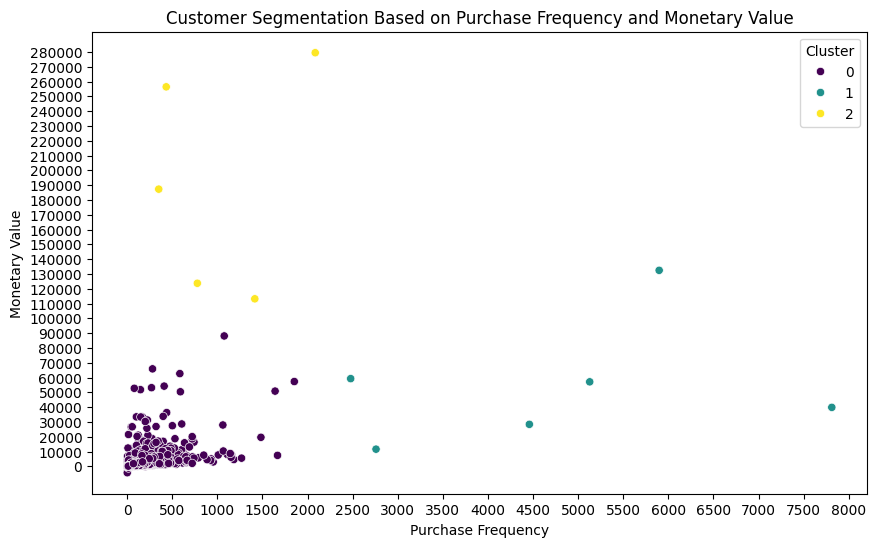

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PurchaseFrequency', y='MonetaryValue', hue='Cluster', data=customer_segmentation, palette='viridis')

# Set the title and labels
plt.title('Customer Segmentation Based on Purchase Frequency and Monetary Value')
plt.xlabel('Purchase Frequency')
plt.ylabel('Monetary Value')

# Set the y-axis ticks with an interval of 10000
plt.yticks(range(0, int(customer_segmentation['MonetaryValue'].max()) + 10000, 10000))

# Set the x-axis ticks with an interval of 500
plt.xticks(range(0, int(customer_segmentation['PurchaseFrequency'].max()) + 500, 500))

# Show the plot
plt.show()
